# Bandwidth Testing

In this notebook we explore bandwidth testing. As we could not get our own files to be served via Http3, we could only conduct file transfers of up to 10MB. This was because we used a public server that could serve files over http3 and http2.

In [1]:
def get_bandwidth(path):
    with open(path, "r") as f:
        data = f.readlines()
    speed = []
    for i in range(4, len(data)):
        current_speed = data[i].split()[-1].strip("\n")
        speed.append(current_speed)
        
    byte_array = []
    for i in speed:
        if i[-1] == "k":
            byte_array.append(float(i[:-1])* 1000)
        elif i[-1] == "M":
            byte_array.append(float(i[:-1])* 1000000)
        elif i[-1] == "G":
            byte_array.append(float(i[:-1])* 1000000000)
        else:
            byte_array.append(float(i))
        
    time = [i for i in range(len(speed))]
    
    average_bandwidth = sum(byte_array)/len(byte_array)
    
    max_bandwidth = 0
    for bw in byte_array:
        if bw > max_bandwidth:
            max_bandwidth = bw
            
    return time, byte_array, average_bandwidth, max_bandwidth

In [2]:
import matplotlib.pyplot as plt
def basic_plot(x_axis, y_axis, title, x_label, y_label):
    plt.figure(figsize=[10,6])
    plt.plot(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [7]:
 def get_statistics(standard): # take in 2 or 3
    max_bw = []
    ave_bw = []
    current_speeds = []
    for i in range(10):
        time, speed, ave_bw_i, max_bw_i = get_bandwidth(f"http{standard}_logs/http{standard}_{i+1}.log")
        max_bw.append(max_bw_i)
        ave_bw.append(ave_bw_i)
        current_speeds.append(speed)
    return max(max_bw), sum(ave_bw)/len(ave_bw), current_speeds

In [51]:
import numpy as np
def get_average_graph_axes(data):
    maxx_len = max([len(i) for i in data])
    bandwidth = [0 for i in range(maxx_len)]
    counts = [0 for i in range(maxx_len)]
    for i in range(10): # 10 logs
        for position, data_point in enumerate(data[i]):
            bandwidth[position] += data_point
            counts[position] += 1

    ave_bw = np.divide(np.array(bandwidth), np.array(counts))
    time_axis = [i for i in range(len(ave_bw))]
    
    return time_axis, ave_bw 

# Test analysis

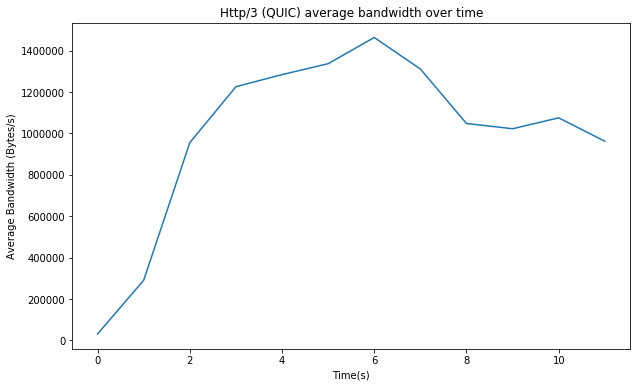

HTTP3 (QUIC)
Overall max bandwidth = 2262000.0 B/s
Overall average bandwidth = 1000341.3924603174 B/s


In [50]:
max_bw_http3, ave_bw_http3, bandwidth_data_http3 = get_statistics(3)
time_http3, ave_bw_http3 = get_average_graph_axes(bandwidth_data_http3)
overall_ave3 = sum(ave_bw_http3)/float(len(ave_bw_http3))

basic_plot(time_http3, ave_bw_http3, "Http/3 (QUIC) average bandwidth over time", "Time(s)", "Average Bandwidth (Bytes/s)")
print(f"HTTP3 (QUIC)\nOverall max bandwidth = {max_bw_http3} B/s\nOverall average bandwidth = {overall_ave3} B/s")

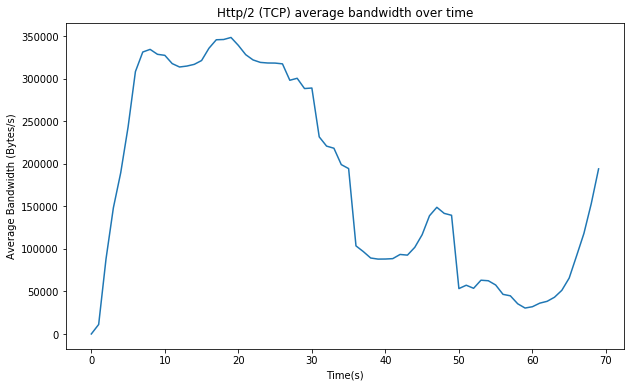

HTTP/2 (TCP)
Overall max bandwidth = 494000.0 B/s
Overall average bandwidth = 180405.26805555556 B/s


In [49]:
max_bw_http2, ave_bw_http2, bandwidth_data_http2 = get_statistics(2)
time_http2, ave_bw_http2 = get_average_graph_axes(bandwidth_data_http2)
overall_ave2 = sum(ave_bw_http2)/float(len(ave_bw_http2))

basic_plot(time_http2, ave_bw_http2, "Http/2 (TCP) average bandwidth over time", "Time(s)", "Average Bandwidth (Bytes/s)")
print(f"HTTP/2 (TCP)\nOverall max bandwidth = {max_bw_http2} B/s\nOverall average bandwidth = {overall_ave2} B/s")

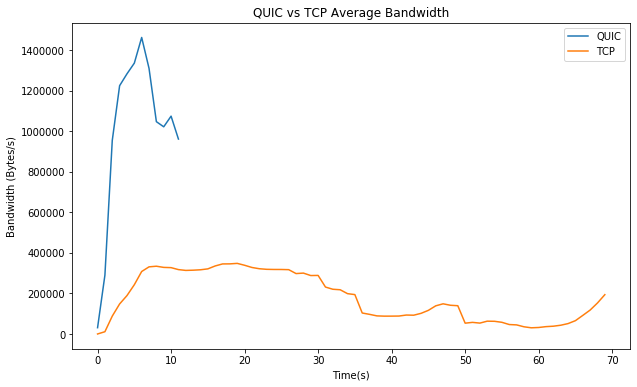

In [79]:
plt.figure(figsize=[10,6])
plt.plot(time_http3, ave_bw_http3, label="QUIC")
plt.plot(time_http2, ave_bw_http2, label="TCP")
plt.title(f"QUIC vs TCP Average Bandwidth")
plt.xlabel("Time(s)")
plt.ylabel("Bandwidth (Bytes/s)")
plt.legend()
plt.show()

# Test procedure
For both HTTP3 and HTTP2 testing, we wrote a script to download a 10MB file 10 times for each HTTP standard off a http3 capable public server. Both test procedures involved downloading the aboved mentioned file from a Virtual Machine running Ubuntu 18.04 using curl v7.68 over SUTD wifi.

# Results
---
## HTTP3 using QUIC
When downloading the 10MB file, we see that the average bandwith is around 1 MB/s while the max bandwidth is around 2.2 MB/s.


## HTTP2 using TCP
We conducted the tests for the directly after the http3 tests to minimize variation. We can see that the ma bandwidth is only 0.5 MB/s while the average bandwidth is around 0.18 MB/s.


## Analysis
QUIC shows significant real world performance gain in bandwidth testing when compared to TCP. We suspect that QUIC, more aggressively probes for more bandwidth as compared to TCP. This can be seen by the gradients of the graphs below. Since QUIC utilizes UDP, it can probably increase its CWND size more rapidly than in TCP.

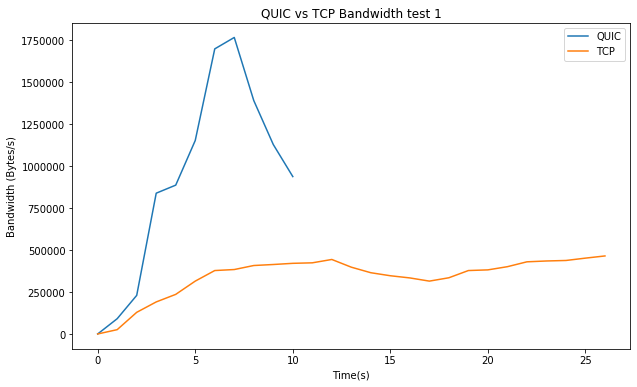

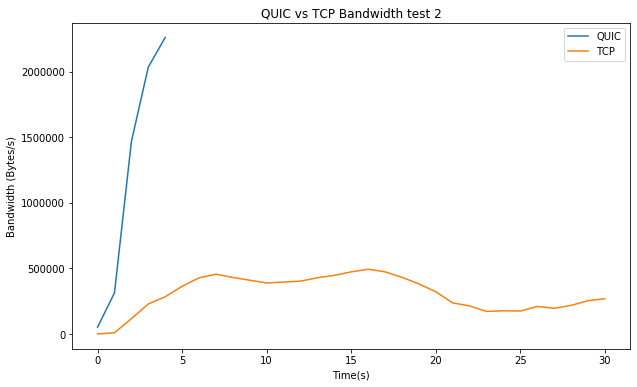

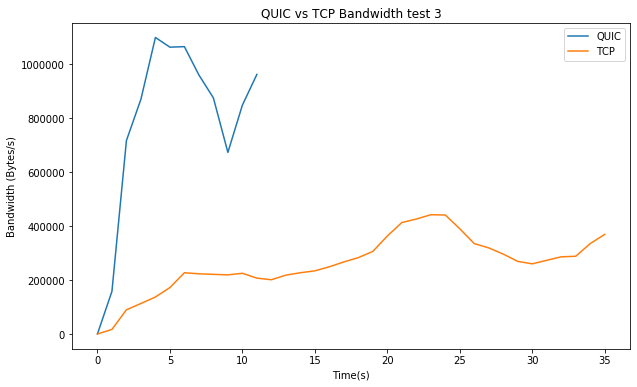

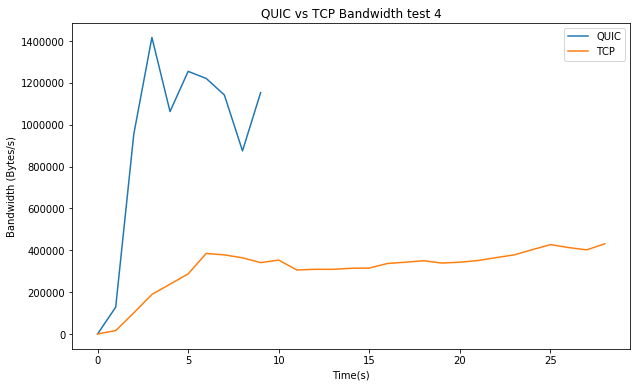

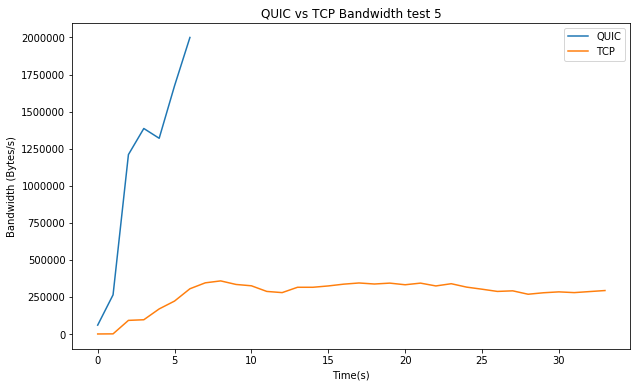

In [74]:
for i in range(5):
    time3, bandwidth3, ave_bw3, max_bw3 = get_bandwidth(f"http3_logs/http3_{i+1}.log")
    time2, bandwidth2, ave_bw2, max_bw2 = get_bandwidth(f"http2_logs/http2_{i+1}.log")
    plt.figure(figsize=[10,6])
    plt.plot(time3, bandwidth3, label="QUIC")
    plt.plot(time2, bandwidth2, label="TCP")
    plt.title(f"QUIC vs TCP Bandwidth test {i+1}")
    plt.xlabel("Time(s)")
    plt.ylabel("Bandwidth (Bytes/s)")
    plt.legend()
    plt.show()